In [4]:
from sklearn.linear_model import LogisticRegression as LR 
from sklearn.datasets import load_breast_cancer 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [5]:
data=load_breast_cancer()
X=data.data 
y=data.target

In [9]:
data.data.shape

(569, 30)

#### L1正则化会将参数压缩为0，L2正则化只会让参数尽量小，不会取到0

In [10]:
lrl1=LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)

In [11]:
lrl2=LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)#逻辑回归的重要属性coef_，查看每个特征所对应的参数
lrl1=lrl1.fit(X,y)
lrl1.coef_

array([[ 4.01576821,  0.03221589, -0.13919259, -0.0162425 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50606818,  0.        , -0.07128061,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24619248, -0.12884519, -0.0143898 ,  0.        ,
         0.        , -2.02294264,  0.        ,  0.        ,  0.        ]])

In [12]:
(lrl1.coef_!=0).sum(axis=1)

array([10])

In [13]:
lrl2=lrl2.fit(X,y)
lrl2.coef_

array([[ 1.61331113e+00,  1.00124606e-01,  4.60084835e-02,
        -4.19839426e-03, -9.26228937e-02, -3.00484301e-01,
        -4.53250190e-01, -2.19778015e-01, -1.33074668e-01,
        -1.92576286e-02,  1.89635811e-02,  8.74998561e-01,
         1.32421950e-01, -9.53784315e-02, -9.62972408e-03,
        -2.53596204e-02, -5.83890299e-02, -2.67755115e-02,
        -2.73846616e-02, -8.05302922e-05,  1.28529688e+00,
        -3.00088054e-01, -1.74310770e-01, -2.23545072e-02,
        -1.70267493e-01, -8.77272211e-01, -1.15830085e+00,
        -4.22526360e-01, -4.12406225e-01, -8.66393364e-02]])

当我们选择L1正则化的时候，许多特征的参数都被设置为了0，这些特征在真正建模的时候，就不会出现在我们的模型当中了，而L2正则化则是对所有的特征都给出了参数。

#### 学习曲线

C正则化强度的倒数，必须是一个大于0的浮点数，不填写默认1.0，即默认正则项与损失函数的比值是1：1。C越小，损失函数会越小，模型对损失函数的惩罚越重，正则化的效力越强，参数会逐渐被压缩得越来越小

In [16]:
l1=[]
l2=[]
l1test=[]
l2test=[]
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=420)
for i in np.linspace(0.05,1,19):
    lrl1=LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2=LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    lrl1=lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    
    lrl2=lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))

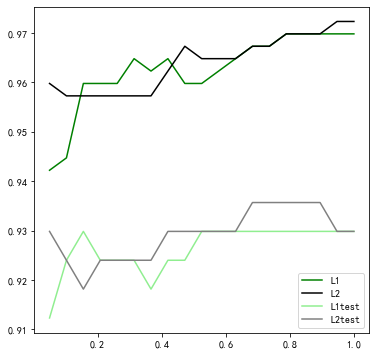

In [17]:
graph=[l1,l2,l1test,l2test]
color=["green","black","lightgreen","gray"]
label=["L1","L2","L1test","L2test"]
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
    plt.legend(loc=4)#图例的位置在哪里?4表示，右下角
plt.show()

可见，至少在我们的乳腺癌数据集下，两种正则化的结果区别不大。但随着C的逐渐变大，正则化的强度越来越
小，模型在训练集和测试集上的表现都呈上升趋势，直到C=0.8左右，训练集上的表现依然在走高，但模型在未知数据集上的表现开始下跌，这时候就是出现了过拟合。我们可以认为，C设定为0.8会比较好。在实际使用时，基本就默认使用l2正则化，如果感觉到模型的效果不好，那就换L1试试看。